In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


## Table of Contents:
* [Introduction](#Introduction)
* [Load and Process Data](#LoadProcessData)
* [Define Model and its Architecture](#Model)
* [Optimizer and Cost Function](#OptimizerCost)
* [Train Model](#TrainTrainTrain)
* [Evaluate Model](#Evaluate)


## Introduction <a class="anchor" id="Introduction"></a>

## Load and Process data <a class="anchor" id="LoadProcessData"></a>

In [2]:
# input image dimensions
num_classes = 10 # 10 clothing types

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

# reshape and rescale data
X_train, X_test = X_train[:,:,:,None] / 255, X_test[:,:,:,None] / 255

input_shape = X_train.shape[1:]

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

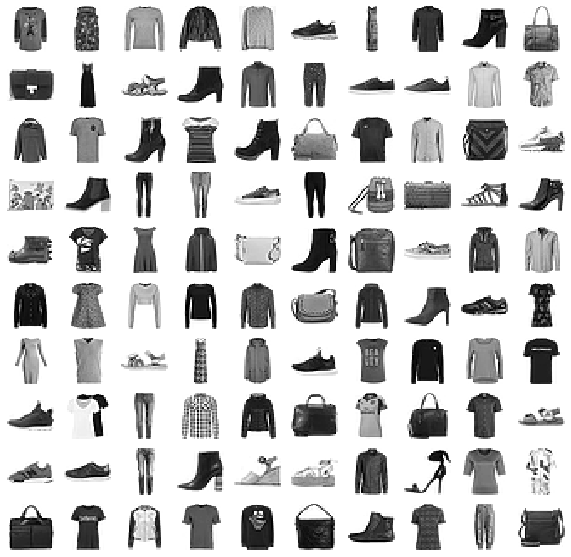

In [3]:
fig, axs = plt.subplots(10,10, figsize=(10,10))
axes = axs.ravel()
idx = np.random.choice(len(X_train), size=len(axes))
for (i,ax) in zip(idx,axes):
    ax.matshow(X_train[i,:].reshape(28,28),cmap='binary')
    ax.axis('off')

## Define Model and its Architecture <a class="anchor" id="Model"></a>

In [4]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (5, 5), activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    return model

## Optimizer and Cost Function <a class="anchor" id="OptimizerCost"></a>

In [5]:

def compile_model(optimizer=keras.optimizers.Adam(), CNN=False): 
    # create the model
    model = create_CNN()
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [40]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
opt = optimizer[3]

## Train Model <a class="anchor" id="TrainTrainTrain"></a>

In [41]:
# training parameters
batch_size = 64
epochs = 10

# create the deep neural net
model_CNN = compile_model(optimizer=opt)

# train DNN and store training info in history
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = model_CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=.2, callbacks=[es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 384us/step - loss: 0.6644 - acc: 0.7541 - val_loss: 0.4839 - val_acc: 0.8310
Epoch 2/10
48000/48000 [==============================] - 18s 379us/step - loss: 0.4603 - acc: 0.8344 - val_loss: 0.4279 - val_acc: 0.8618
Epoch 3/10
48000/48000 [==============================] - 18s 375us/step - loss: 0.4105 - acc: 0.8509 - val_loss: 0.3938 - val_acc: 0.8626
Epoch 4/10
48000/48000 [==============================] - 18s 368us/step - loss: 0.3806 - acc: 0.8620 - val_loss: 0.3612 - val_acc: 0.8789
Epoch 5/10
48000/48000 [==============================] - 18s 366us/step - loss: 0.3615 - acc: 0.8689 - val_loss: 0.3446 - val_acc: 0.8860
Epoch 6/10
48000/48000 [==============================] - 17s 362us/step - loss: 0.3479 - acc: 0.8745 - val_loss: 0.3205 - val_acc: 0.8921
Epoch 7/10
48000/48000 [==============================] - 18s 379us/step - loss: 0.3337 - acc: 0.8784 - val_loss: 0.

## Evaluate Model <a class="anchor" id="Evaluate"></a>

10000/10000 [==============================] - 1s 140us/step

Test loss: 0.3364753312587738
Test accuracy: 0.8833


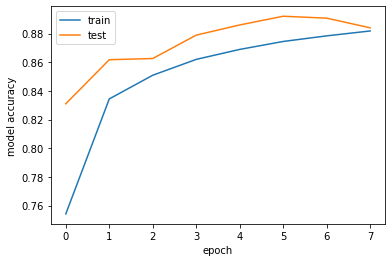

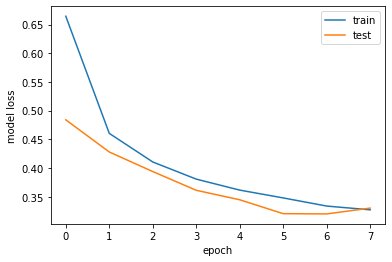

In [42]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [43]:
ypred = model_CNN.predict(X_test).argmax(axis=-1)

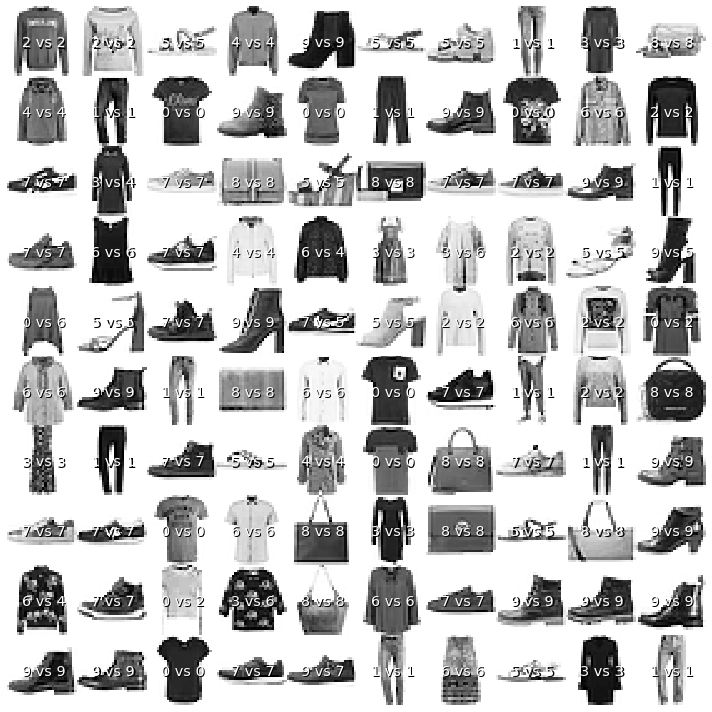

In [44]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
axs = np.ravel(axs)
idx = np.random.choice(len(X_test), size=len(axs))
for (i, ax) in zip(idx, axs):
    ax.imshow(X_test[i][:,:,0], cmap='Greys')
    ax.text(14.5, 14.5, f'{Y_test[i].argmax()} vs {ypred[i]}', color='k', size='x-large', ha='center', va='center')
    ax.text(14, 14, f'{Y_test[i].argmax()} vs {ypred[i]}', color='w', size='x-large', ha='center', va='center')
    ax.axis('off')
plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)